# Lucia Depaoli
# 2016960

# Ex 1
A publishing company has recently launched a new journal. In order to determine how effective it is in reaching its possible audience, a market survey company selects a random sample of people from a possible target audience and interviews them. Out of $150$ interviewed people, $29$ have read the last issue of the journal.

### 1.1
What kind of distribution would you assume for $y$, the number of people that have seen the last issue of the journal?

I would assume a binomial distribution.

In [1]:
N <- 150
k <- 29
parameter <- seq(0, 1, by = 0.001)
n <- length(parameter)
delta <- 1/n

likelihood <- dbinom(k, size = N, prob = parameter)

### 1.2
Assuming a uniform prior, what is the posterior distribution for $y$?

In [2]:
prior <- dbeta(parameter, 1, 1)

num <- likelihood * prior
den <- sum(num) * delta
posterior <- num / den

### 1.3 
Plot both posterior and likelihood ditributions functions.

They are the same plot just with different scales because of the uniform prior.

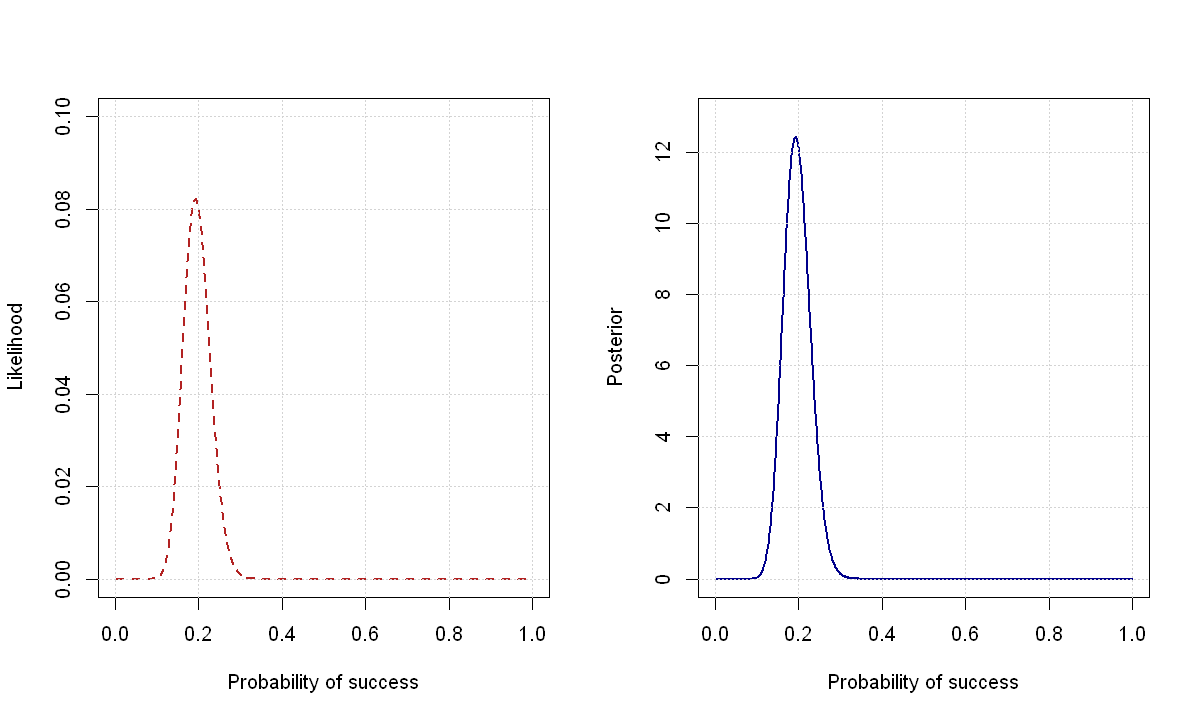

In [3]:
options(repr.plot.width = 10, repr.plot.height = 6)
par(mfrow=c(1,2))
plot(parameter, likelihood, type="l", col="firebrick",lwd=2,lty=2, 
     ylab="Likelihood", xlab="Probability of success", xlim=c(0,1), ylim=c(0,0.1))
grid()

plot(parameter, posterior, type="l",col="blue4",lwd=2,lty=1,
     ylab="Posterior", xlab="Probability of success", xlim=c(0,1), ylim=c(0,13))
grid()

# Ex 2
Three students want to construct their prior probability about the proportion of residents that support the building of a new concert hall in their small town.

Anna thinks that her prior is a beta distribution with mean $0.2$ and a standard deviation of $0.08$.\
Benny moved only recently to this new town and therefore he does non have the slightest idea about it. Therefore he decides to use a uniform prior.\
Chris believes that his prior should have a trapezoidal shape.

### 2.1
Draw and compare the three prior distributions.

Function to estimate beta parameters given mean and variance.

In [4]:
beta_params <- function(mu, var) {
    alpha <- ((1-mu)/var - 1/mu)*mu^2
    beta <- alpha*(1/mu - 1)
    return (c(alpha,beta))
}
ab <- beta_params(0.2, 0.08^2)

In [5]:
parameter <- seq(0, 1, by = 0.001)
n <- length(parameter)
delta <- 1/n

prior_anna <- dbeta(parameter, ab[1], ab[2])
prior_benny <- dbeta(parameter, 1, 1)
prior_chris <- function(x){
    ifelse(0 <= x & x < 0.1,
          20*x,
          ifelse(0.1 <= x & x < 0.3,
                2,
                ifelse(0.3 <=x & x < 0.5,
                      5 - 10*x,
                      0)))
}

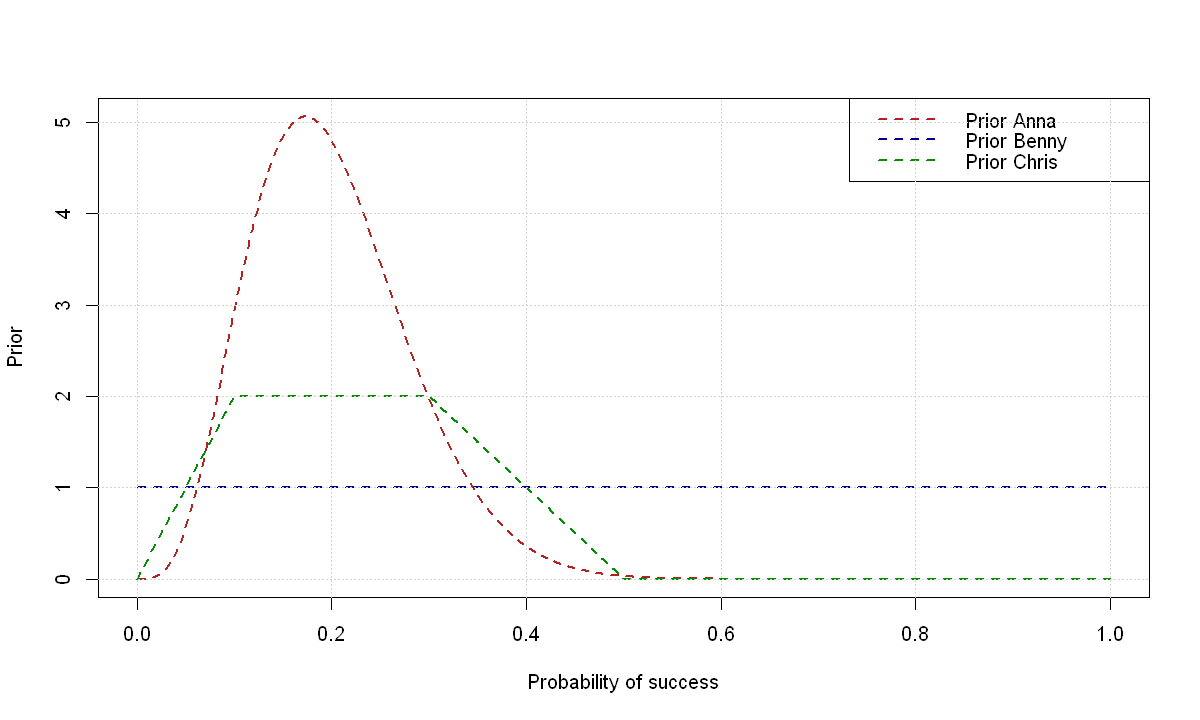

In [6]:
plot(parameter, prior_anna, type="l", col="firebrick", lwd=2, lty=2, ylab="Prior", xlab="Probability of success")
lines(parameter, prior_benny, type="l", col="blue4", lwd=2, lty=2)
lines(parameter, prior_chris(parameter), type="l", col="green4", lwd=2, lty=2)
legend("topright", c("Prior Anna", "Prior Benny", 'Prior Chris'), col=c('firebrick', 'blue4', 'green4'), lwd=2, lty=2)
grid()

The next day the three students decide to interview a sample of $100$ citizens of the small town, asking for their opinion. Out of the interviewed sample, 26 support the building of the new concert hall.

### 2.2
Evaluate and draw the three posterior distributions.

In [7]:
N <- 100
k <- 26

likelihood <- dbinom(k, size = N, prob = parameter)

num <- likelihood * prior_anna
den <- sum(num) * delta
posterior_anna <- num / den

num <- likelihood * prior_benny
den <- sum(num) * delta
posterior_benny <- num / den

num <- likelihood * prior_chris(parameter)
den <- sum(num) * delta
posterior_chris <- num / den

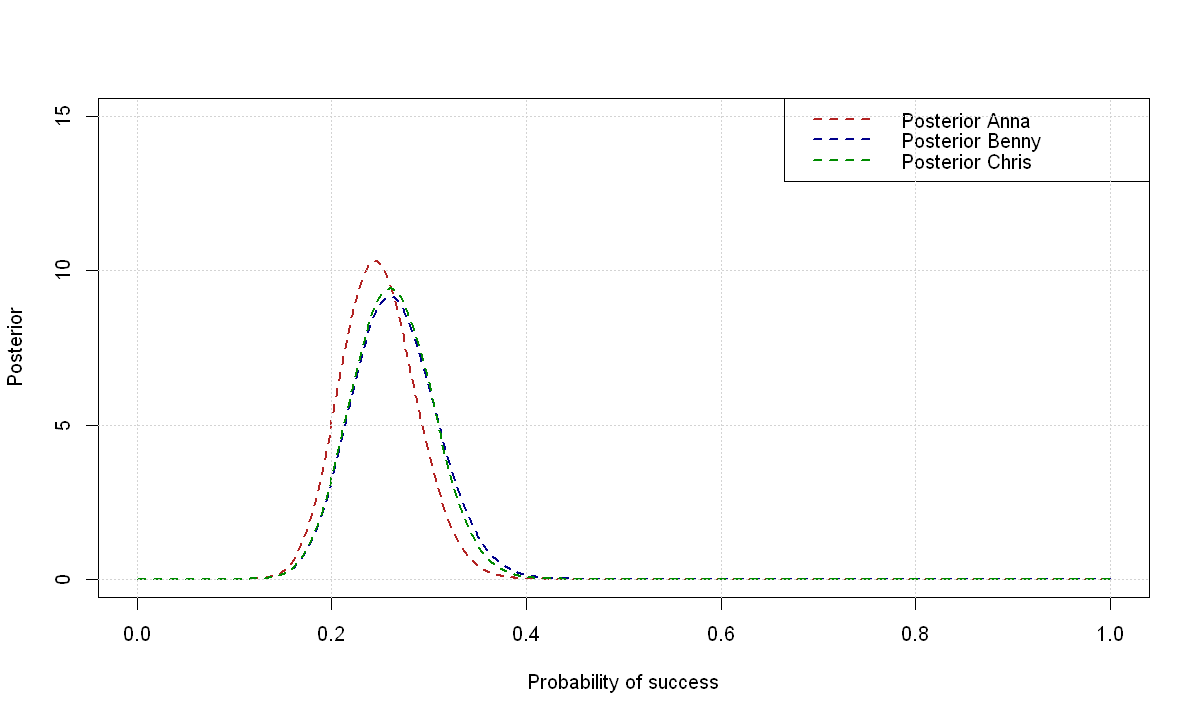

In [8]:
plot(parameter, posterior_anna, type="l",col="firebrick",lwd=2,lty=2,ylim=c(0,15), xlim=c(0,1), 
    ylab="Posterior", xlab="Probability of success")
lines(parameter, posterior_benny, type="l",col="blue4",lwd=2,lty=2,ylim=c(0,15), xlim=c(0,1))
lines(parameter, posterior_chris, type="l",col="green4",lwd=2,lty=2,ylim=c(0,15), xlim=c(0,1))
legend("topright", c("Posterior Anna", "Posterior Benny", 'Posterior Chris'), col=c('firebrick', 'blue4', 'green4'),
       lwd=2, lty=2)
grid()

### 2.3
Give an estimate of the most probable value and the $95$% credibility interval.

In order to do this, I evaluated the cumsum of the posteriors and find the index of the last value that is outside the $95$% region.

In [9]:
x1_anna <- parameter[tail(which(cumsum(posterior_anna)/sum(posterior_anna) < 0.025),1)]
x2_anna <- parameter[tail(which(cumsum(posterior_anna)/sum(posterior_anna) < 1- 0.025),1)]
xmax_anna <- parameter[which.max(posterior_anna)]
cat('Anna most probable value of the posterior is: ',xmax_anna,'\n')

x1_benny <- parameter[tail(which(cumsum(posterior_benny)/sum(posterior_benny) < 0.025),1)]
x2_benny <- parameter[tail(which(cumsum(posterior_benny)/sum(posterior_benny) < 1- 0.025),1)]
xmax_benny <- parameter[which.max(posterior_benny)]
cat('Benny most probable value of the posterior is: ',xmax_benny,'\n')

x1_chris <- parameter[tail(which(cumsum(posterior_chris)/sum(posterior_chris) < 0.025),1)]
x2_chris <- parameter[tail(which(cumsum(posterior_chris)/sum(posterior_chris) < 1- 0.025),1)]
xmax_chris <- parameter[which.max(posterior_chris)]
cat('Chris most probable value of the posterior is: ',xmax_chris,'\n')

Anna most probable value of the posterior is:  0.244 
Benny most probable value of the posterior is:  0.26 
Chris most probable value of the posterior is:  0.26 


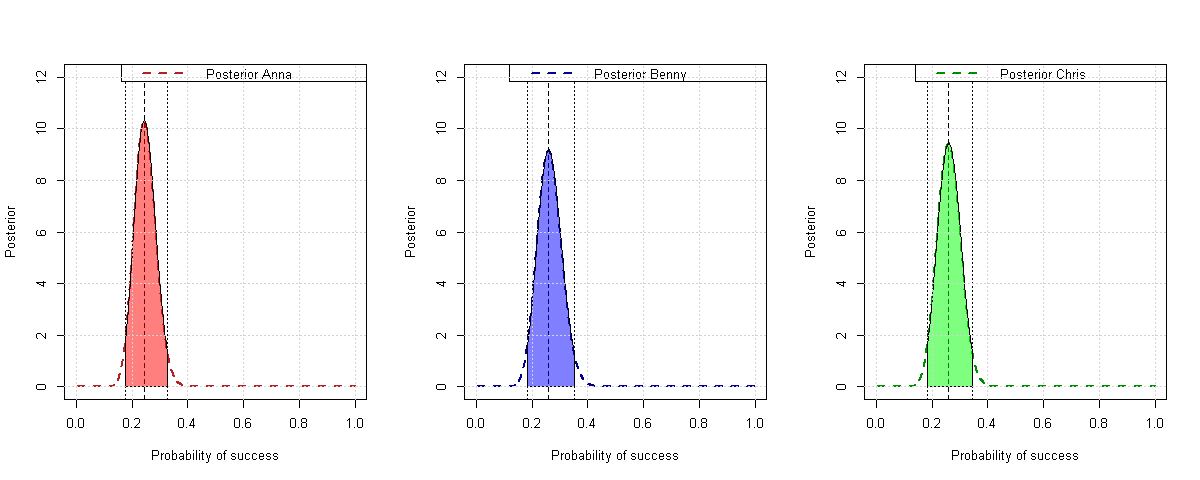

In [10]:
options(repr.plot.width = 10, repr.plot.height = 4)
par(mfrow=c(1,3))

plot(parameter, posterior_anna, type="l",col="firebrick",lwd=2,lty=2,ylim=c(0,12), xlim=c(0,1),
    ylab="Posterior", xlab="Probability of success")
abline(v=x1_anna, lty=3,col='black')
abline(v=x2_anna, lty=3,col='black')
abline(v=xmax_anna, lty=2,col='black')
legend("topright", "Posterior Anna", col='firebrick',
       lwd=2, lty=2)
polygon(c(parameter[parameter >= x1_anna & parameter <= x2_anna], x2_anna, x1_anna),
        c(posterior_anna[parameter >= x1_anna & parameter <= x2_anna], 0, 0),
        col=rgb(1,0,0,0.5))
grid()

plot(parameter, posterior_benny, type="l", col="blue4",lwd=2,lty=2,ylim=c(0,12), xlim=c(0,1),
    ylab="Posterior", xlab="Probability of success")
abline(v=x1_benny, lty=3,col='black')
abline(v=x2_benny, lty=3,col='black')
abline(v=xmax_benny, lty=2,col='black')
legend("topright", "Posterior Benny", col='blue4',
       lwd=2, lty=2)
polygon(c(parameter[parameter >= x1_benny & parameter <= x2_benny], x2_benny, x1_benny),
        c(posterior_benny[parameter >= x1_benny & parameter <= x2_benny], 0, 0),
        col=rgb(0,0,1,0.5))
grid()

plot(parameter, posterior_chris, type="l",col="green4",lwd=2,lty=2,ylim=c(0,12), xlim=c(0,1),
    ylab="Posterior", xlab="Probability of success")
abline(v=x1_chris, lty=3,col='black')
abline(v=x2_chris, lty=3,col='black')
abline(v=xmax_chris, lty=2,col='black')
legend("topright", "Posterior Chris", col='green4',
       lwd=2, lty=2)
polygon(c(parameter[parameter >= x1_chris & parameter <= x2_chris], x2_chris, x1_chris),
        c(posterior_chris[parameter >= x1_chris & parameter <= x2_chris], 0, 0),
        col=rgb(0,1,0,0.5))
grid()

# Ex 3
A coin is flipped $n = 30$ times with the following outcomes:
T, T, T, T, T, H, T, T, H, H, T, T, H, H, H, T, H, T, H, T, H, H, T, H, T, H, T, H, H, H

### 3.1
Assuming a flat prior, and a beta prior, plot the likelihood, prior and posterior distributions for the data set.

In [11]:
N <- 30
t <- 15

parameter <- seq(0, 1, by = 0.001)
n <- length(parameter)
delta <- 1/n

prior_flat <- dbeta(parameter, 1, 1)
prior_beta <- dbeta(parameter, 2, 7) #beta at random

likelihood <- dbinom(t, size = N, prob = parameter)

num <- likelihood * prior_flat
den <- sum(num) * delta
posterior_flat <- num / den

num <- likelihood * prior_beta
den <- sum(num) * delta
posterior_beta <- num / den

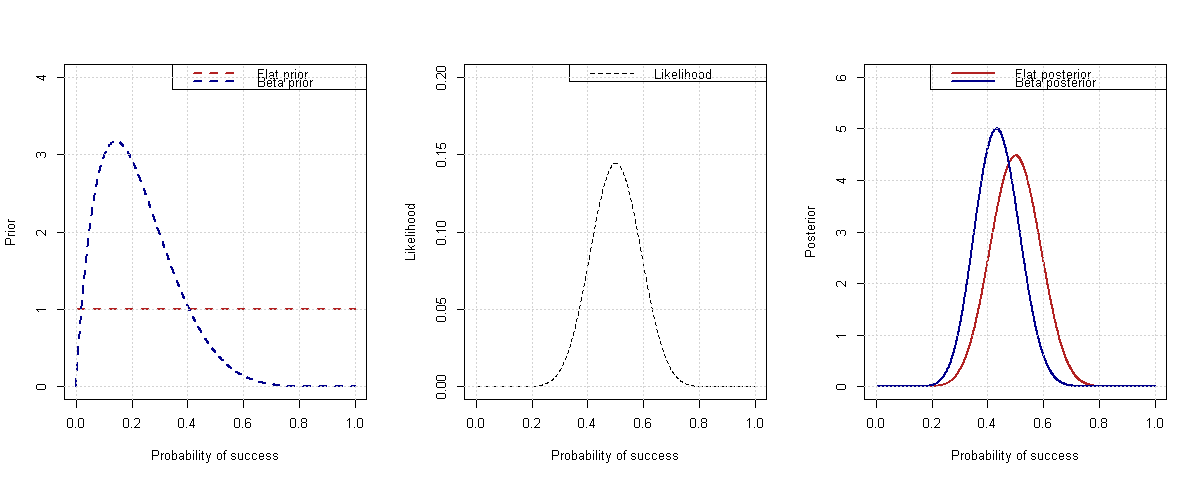

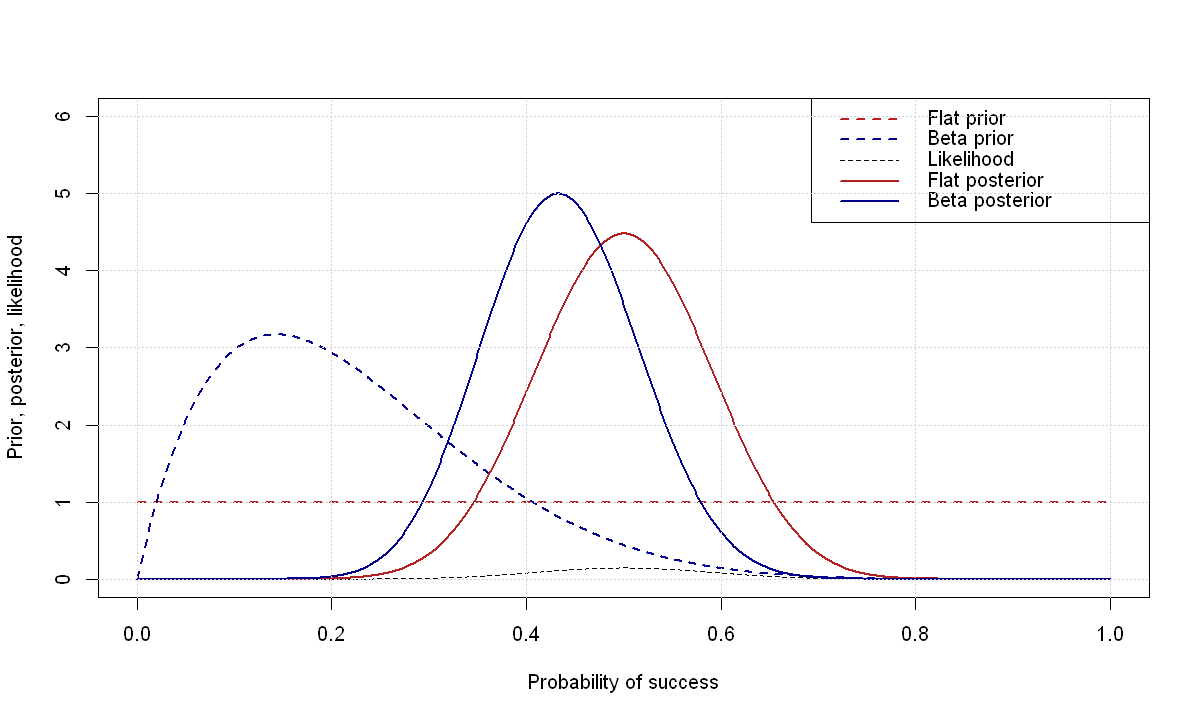

In [12]:
options(repr.plot.width = 10, repr.plot.height = 4)
par(mfrow=c(1,3))

plot(parameter, prior_flat,type="l",col="firebrick",lwd=2,lty=2,ylim=c(0,4),
    ylab="Prior", xlab="Probability of success")
lines(parameter, prior_beta,type="l",col="blue4",lwd=2,lty=2)
legend("topright", c("Flat prior", "Beta prior"), col=c('firebrick', 'blue4'),
       lwd=2, lty=2)
grid()

plot(parameter, likelihood,type="l",col="black",lwd=1,lty=2,ylim=c(0,0.2),
    ylab="Likelihood", xlab="Probability of success")
legend("topright", "Likelihood", col='black',
       lwd=1, lty=2)
grid()

plot(parameter, posterior_flat, type="l",col="firebrick",lwd=2,lty=1,ylim=c(0,6), xlim=c(0,1),
    ylab="Posterior", xlab="Probability of success")
lines(parameter, posterior_beta, type="l",col="blue4",lwd=2,lty=1)
legend("topright", c("Flat posterior", "Beta posterior"), col=c('firebrick', 'blue4'),
       lwd=2, lty=1)
grid()

options(repr.plot.width = 10, repr.plot.height = 6)
par(mfrow=c(1,1))

plot(parameter, prior_flat,type="l",col="firebrick",lwd=2,lty=2,ylim=c(0,6),
    ylab="Prior, posterior, likelihood", xlab="Probability of success")
lines(parameter, prior_beta,type="l",col="blue4",lwd=2,lty=2)
lines(parameter, likelihood,type="l",col="black",lwd=1,lty=2)
lines(parameter, posterior_flat, type="l",col="firebrick",lwd=2,lty=1)
lines(parameter, posterior_beta, type="l",col="blue4",lwd=2,lty=1)

legend("topright", c("Flat prior", "Beta prior", 'Likelihood',
                    "Flat posterior", "Beta posterior"), col=c('firebrick', 'blue4','black','firebrick', 'blue4'),
       lwd=c(2,2,1,2,2), lty=c(2,2,2,1,1))
grid()

### 3.2
Evaluate the most probable value for the coin probability p and, integrating the posterior probability distribution, give an estimate for a $95$% credibility interval.

In [13]:
x1_flat <- parameter[tail(which(cumsum(posterior_flat)/sum(posterior_flat) < 0.025),1)]
x2_flat <- parameter[tail(which(cumsum(posterior_flat)/sum(posterior_flat) < 1- 0.025),1)]
xmax_flat <- parameter[which.max(posterior_flat)]
cat('x1 flat: ',x1_flat,'\n')
cat('x2 flat: ',x2_flat,'\n')
cat('Most probable value of the flat posterior is: ',xmax_flat,'\n')

x1_beta <- parameter[tail(which(cumsum(posterior_beta)/sum(posterior_beta) < 0.025),1)]
x2_beta <- parameter[tail(which(cumsum(posterior_beta)/sum(posterior_beta) < 1- 0.025),1)]
xmax_beta <- parameter[which.max(posterior_beta)]
cat('x1 beta: ',x1_beta,'\n')
cat('x2 beta: ',x2_beta,'\n')
cat('Most probable value of the beta posterior is: ',xmax_beta,'\n')

x1 flat:  0.33 
x2 flat:  0.668 
Most probable value of the flat posterior is:  0.5 
x1 beta:  0.285 
x2 beta:  0.591 
Most probable value of the beta posterior is:  0.432 


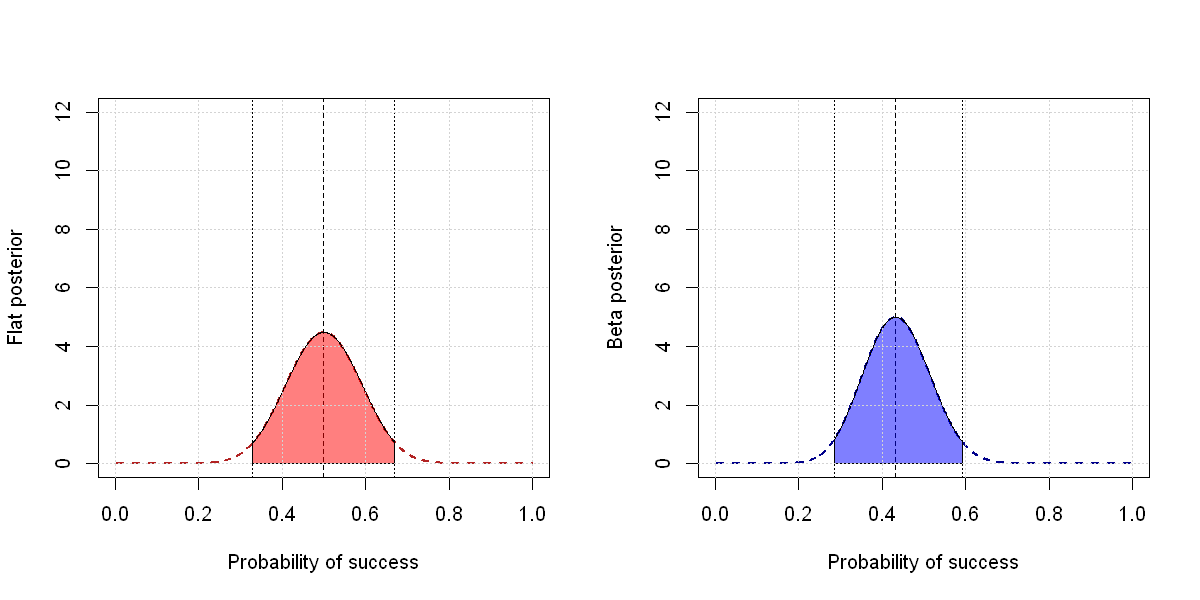

In [14]:
options(repr.plot.width = 10, repr.plot.height = 5)
par(mfrow=c(1,2))

plot(parameter, posterior_flat, type="l",col="firebrick",lwd=2,lty=2,ylim=c(0,12), xlim=c(0,1),
    ylab="Flat posterior", xlab="Probability of success")
abline(v=x1_flat, lty=3,col='black')
abline(v=x2_flat, lty=3,col='black')
abline(v=xmax_flat, lty=2,col='black')
polygon(c(parameter[parameter >= x1_flat & parameter <= x2_flat], x2_flat, x1_flat),
        c(posterior_flat[parameter >= x1_flat & parameter <= x2_flat], 0, 0),
        col=rgb(1,0,0,0.5))
grid()

plot(parameter, posterior_beta, type="l",col="blue4",lwd=2,lty=2,ylim=c(0,12), xlim=c(0,1),
    ylab="Beta posterior", xlab="Probability of success")
abline(v=x1_beta, lty=3,col='black')
abline(v=x2_beta, lty=3,col='black')
abline(v=xmax_beta, lty=2,col='black')
polygon(c(parameter[parameter >= x1_beta & parameter <= x2_beta], x2_beta, x1_beta),
        c(posterior_beta[parameter >= x1_beta & parameter <= x2_beta], 0, 0),
        col=rgb(0,0,1,0.5))
grid()

### 3.3
Repeat the same analysis assuming a sequential analysis of the data. Show how the most probable value and the credibility interval change as a function of the number of coin tosses (i.e. from $1$ to $30$).

In [15]:
tosses <- c('t','t','t','t','t','h','t','t','h','h','t','t','h','h','h','t','h','t','h','t','h','h','t','h','t','h','t','h',
           'h','h')

In [16]:
sequential_analysis <- function(tosses){
    tails <- NULL
    heads <- NULL
    
    parameter <- seq(0, 1, by = 0.001)
    n <- length(parameter)
    delta.p <- 1/n
    
    prior_flat <- dbeta(parameter, 1, 1)
    prior_beta <- dbeta(parameter, 2, 7)

    for (i in 1:length(tosses)){
        if (tosses[i]=='t'){
            tails <- c(tails, tosses[i])
        }
        else{
            heads <- c(heads, tosses[i])
        }
        
        N <- i
        t <- length(tails)
        
        likelihood <- dbinom(t, size = N, prob = parameter)
        
        num <- likelihood * prior_flat
        den <- sum(num) * delta
        posterior_flat <- num / den

        num <- likelihood * prior_beta
        den <- sum(num) * delta
        posterior_beta <- num / den
        
        x1_flat <- parameter[tail(which(cumsum(posterior_flat)/sum(posterior_flat) < 0.025),1)]
        x2_flat <- parameter[tail(which(cumsum(posterior_flat)/sum(posterior_flat) < 1- 0.025),1)]
        xmax_flat <- parameter[which.max(posterior_flat)]
        cat('x1 flat: ',x1_flat,'\n')
        cat('x2 flat: ',x2_flat,'\n')
        cat('xmax flat: ',xmax_flat,'\n')

        x1_beta <- parameter[tail(which(cumsum(posterior_beta)/sum(posterior_beta) < 0.025),1)]
        x2_beta <- parameter[tail(which(cumsum(posterior_beta)/sum(posterior_beta) < 1- 0.025),1)]
        xmax_beta <- parameter[which.max(posterior_beta)]
        cat('x1 beta: ',x1_beta,'\n')
        cat('x2 beta: ',x2_beta,'\n')
        cat('xmax beta: ',xmax_beta,'\n')
    }
}

In [17]:
sequential_analysis(tosses)

x1 flat:  0.157 
x2 flat:  0.987 
xmax flat:  1 
x1 beta:  0.074 
x2 beta:  0.599 
xmax beta:  0.25 
x1 flat:  0.292 
x2 flat:  0.991 
xmax flat:  1 
x1 beta:  0.121 
x2 beta:  0.651 
xmax beta:  0.333 
x1 flat:  0.397 
x2 flat:  0.993 
xmax flat:  1 
x1 beta:  0.166 
x2 beta:  0.691 
xmax beta:  0.4 
x1 flat:  0.477 
x2 flat:  0.994 
xmax flat:  1 
x1 beta:  0.21 
x2 beta:  0.722 
xmax beta:  0.455 
x1 flat:  0.54 
x2 flat:  0.995 
xmax flat:  1 
x1 beta:  0.25 
x2 beta:  0.748 
xmax beta:  0.5 
x1 flat:  0.42 
x2 flat:  0.962 
xmax flat:  0.833 
x1 beta:  0.229 
x2 beta:  0.71 
xmax beta:  0.462 
x1 flat:  0.472 
x2 flat:  0.967 
xmax flat:  0.857 
x1 beta:  0.265 
x2 beta:  0.733 
xmax beta:  0.5 
x1 flat:  0.517 
x2 flat:  0.971 
xmax flat:  0.875 
x1 beta:  0.298 
x2 beta:  0.752 
xmax beta:  0.533 
x1 flat:  0.443 
x2 flat:  0.932 
xmax flat:  0.778 
x1 beta:  0.277 
x2 beta:  0.721 
xmax beta:  0.5 
x1 flat:  0.389 
x2 flat:  0.89 
xmax flat:  0.7 
x1 beta:  0.259 
x2 beta:  0.6

### 3.4
Do you get a different result, by analyzing the data sequentially with respect to a one-step analysis (i.e. considering all the data as a whole)?

No, at the end I obtain the same results.